In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('processed_data_kansas.csv')

df

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,Offense,IBRS,Description,Beat,Address,...,Zip Code,Rep_Dist,Area,DVFlag,Invl_No,Involvement,Race,Sex,Location 1,Firearm Used Flag
0,160007695,02/01/2016 12:00:00 AM,1:58,02/01/2016 12:00:00 AM,1:58,2100,90D,Driving Under Influe,142.0,E 39 ST/GARFIELD AV,...,64109.0,PJ3116,CPD,U,1,ARR,B,M,E 39 ST/GARFIELD AV\nKANSAS CITY 64109\n,N
1,160006559,01/27/2016 12:00:00 AM,13:04,01/25/2016 12:00:00 AM,17:55,630,23C,Stealing Shoplifting,421.0,7100 NW 86 TE,...,64153.0,PP0317,NPD,N,1,SUS,B,F,7100 NW 86 TE\nKANSAS CITY 64153\n,N
2,160023260,04/04/2016 12:00:00 AM,6:35,04/04/2016 12:00:00 AM,6:35,802,13B,Non Agg Assault Dome,141.0,E 39 ST/TROOST AV,...,64110.0,PJ3070,CPD,Y,1,VIC,B,M,E 39 ST/TROOST AV\nKANSAS CITY 64110\n,N
3,160015795,03/05/2016 12:00:00 AM,12:58,03/05/2016 12:00:00 AM,12:50,2655,90J,Trespassing,112.0,00 W 10 ST,...,64105.0,PJ0865,CPD,U,1,VIC,W,M,00 W 10 ST\nKANSAS CITY 64105\n,N
4,160039800,06/05/2016 12:00:00 AM,0:01,06/05/2016 12:00:00 AM,0:01,840,90Z,Resisting an Officer,223.0,E 63 ST/SWOPE PK,...,64120.0,PJ4922,MPD,U,1,VIC,U,U,E 63 ST/SWOPE PK\nKANSAS CITY 64120\n,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110492,160014371,02/29/2016 12:00:00 AM,2:51,02/28/2016 12:00:00 AM,18:34,799,NaN,Auto Theft Outside S,226.0,EAST 63 TRFY & LEWIS RD,...,64110.0,NaN,NaN,U,1,VIC,U,U,EAST 63 TRFY &amp; LEWIS RD\nKANSAS CITY 64110...,N
110493,160046842,06/30/2016 12:00:00 AM,14:22,06/29/2016 12:00:00 AM,23:00,302,120,Armed Robbery,NaN,41ST & GILLHAM,...,NaN,NaN,NaN,U,1,SUS,B,M,"41ST &amp; GILLHAM\nKANSAS CITY\n(39.052774, -...",Y
110494,160033682,05/13/2016 12:00:00 AM,7:03,05/13/2016 12:00:00 AM,6:50,1401,290,Property Damage,NaN,40 & 435 HWY,...,64132.0,NaN,NaN,U,1,SUS,U,U,40 &amp; 435 HWY\nKANSAS CITY 64132\n,N
110495,160006331,01/26/2016 12:00:00 AM,17:45,01/23/2016 12:00:00 AM,8:00,650,23G,Stealing Auto Parts/,NaN,1 H & BLOCK WAY,...,64105.0,NaN,NaN,U,1,SUS,U,U,1 H &amp; BLOCK WAY\nKANSAS CITY 64105\n(39.09...,N


# Sự tương quan dữ liệu giữa các cột dạng số

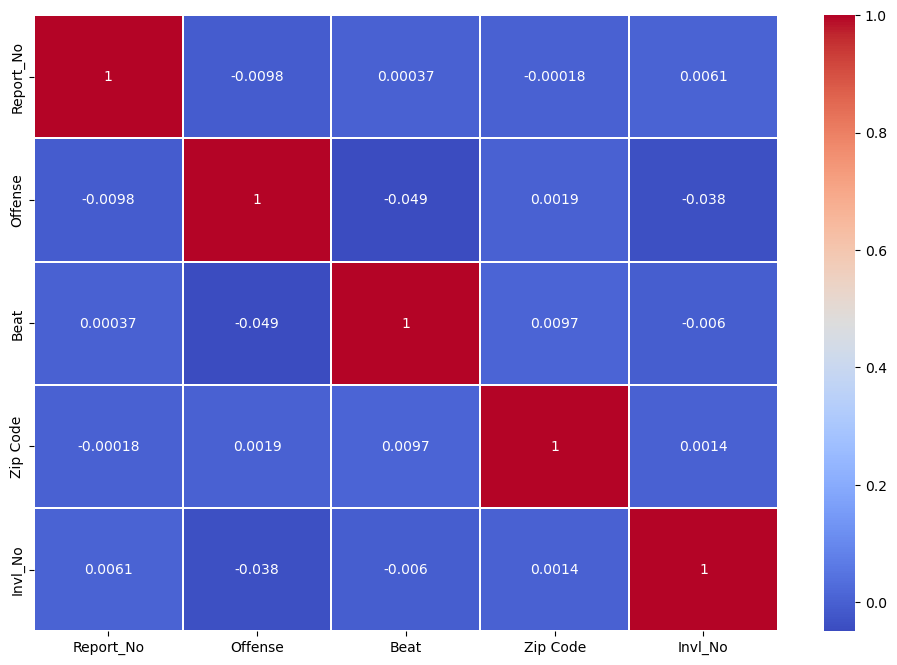

In [6]:
df_heatmap = df.copy().select_dtypes(include=['number'])

# Xóa các dòng có giá trị thiếu
df_heatmap = df_heatmap.dropna()

# vẽ heatmap
# Plotting heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm', linewidths=0.2)
plt.show()

- Hầu hết các giá trị tương quan ngoài đường chéo đều rất gần với 0, điều này chỉ ra rằng mối quan hệ tuyến tính giữa các biến là rất yếu hoặc không có.
- Giá trị tương quan ngoài đường chéo cao nhất là giữa "Offense" và "Beat" với giá trị -0.049, cho thấy một mối quan hệ ngược chiều rất nhẹ. Tuy nhiên, giá trị này vẫn rất gần với 0, cho thấy rằng các biến này không có mối quan hệ tuyến tính mạnh.

# Tổng quát về số lượng phạm tội

C:\Users\PC\AppData\Local\Temp\ipykernel_20536\2923243556.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



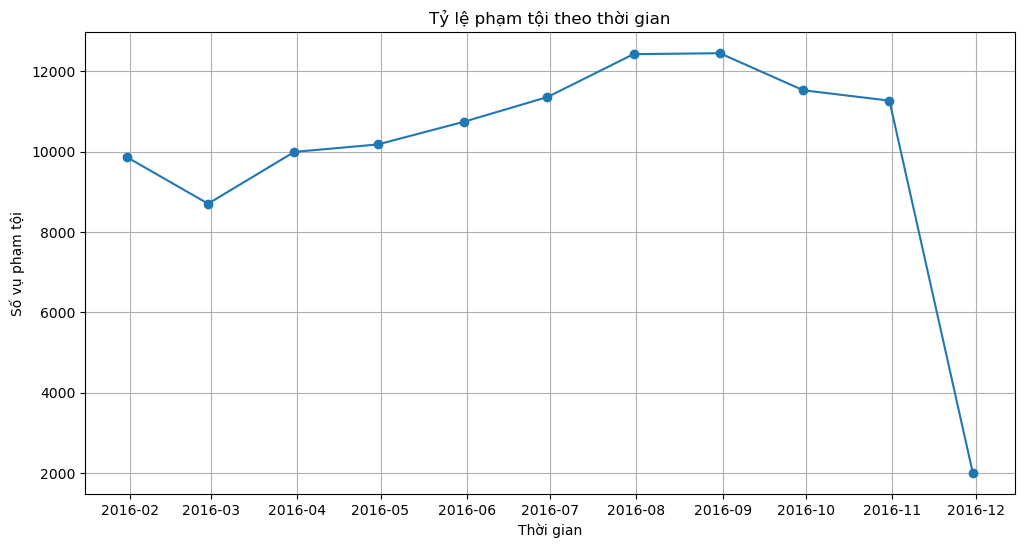

In [50]:
data = df.copy()

# Chuyển đổi cột 'Reported_Date' thành định dạng datetime
data['Reported_Date'] = pd.to_datetime(data['Reported_Date'])

# Thiết lập cột 'Reported_Date' làm chỉ số của DataFrame
data.set_index('Reported_Date', inplace=True)

# Tính toán số lượng vụ phạm tội theo tháng
crime_counts = data.resample('M').size()

# Vẽ biểu đồ biểu diễn tỷ lệ phạm tội theo thời gian
plt.figure(figsize=(12, 6))
plt.plot(crime_counts, marker='o', linestyle='-')
plt.title('Tỷ lệ phạm tội theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số vụ phạm tội')
plt.grid(True)
plt.show()

- Từ tháng 4 đến tháng 8 tỉ lệ phạm tội tăng hơn 20%.
- Giai đoạn tháng 11 đến tháng 12 số lượng phạm tội giảm mạnh (từ 11000 về gần 2000).

# Tần suất phạm tội ở các khung giờ trong tuần

C:\Users\PC\AppData\Local\Temp\ipykernel_20536\2582892092.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



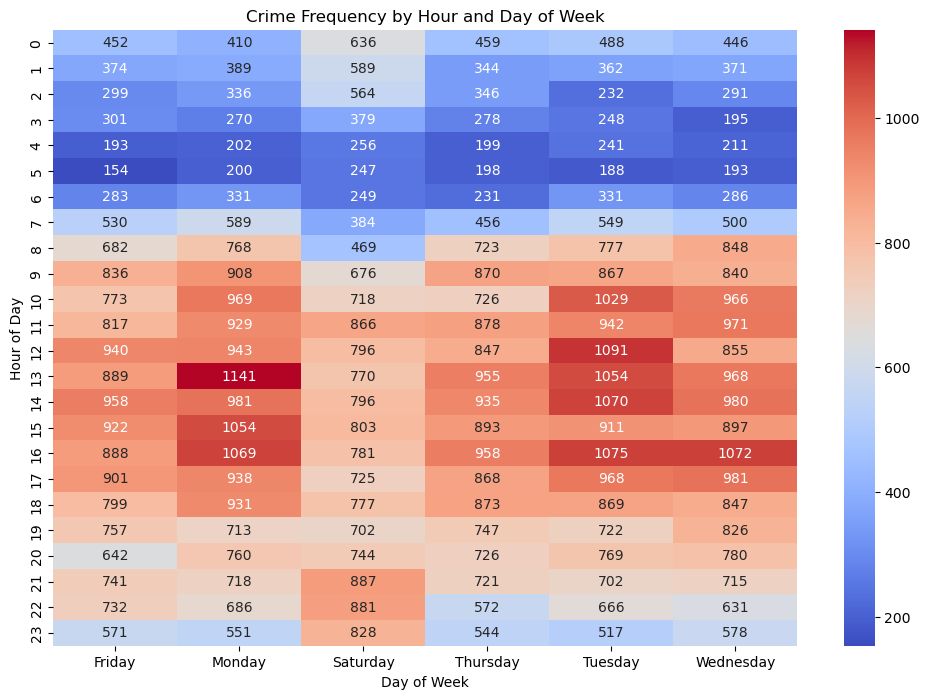

In [54]:
data = df.copy()

# Chuyển đổi cột 'Reported_Date' thành định dạng datetime
data['Reported_Date'] = pd.to_datetime(data['Reported_Date'])

# Tạo cột ngày trong tuần
data['Day_of_Week'] = data['Reported_Date'].dt.day_name()

# Chuyển đổi cột 'Reported_Time' thành giờ trong ngày
data['Reported_Time'] = pd.to_datetime(data['Reported_Time'], format='%H:%M').dt.hour

# Lọc dữ liệu để chỉ bao gồm các ngày từ Thứ 2 đến Thứ 7
data = data[data['Day_of_Week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])]

# Tạo bảng tần suất
frequency_table = pd.crosstab(data['Reported_Time'], data['Day_of_Week'])

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(frequency_table, cmap='coolwarm', annot=True, fmt='d')
plt.title('Crime Frequency by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()

- Thời điểm tội phạm cao điểm:
    + Tần suất tội phạm cao nhất tập trung từ 09:00 (9 giờ sáng) đến 18:00 (6 giờ tối), đặc biệt là từ thứ Hai đến thứ Sáu.
    + Đỉnh điểm tội phạm xuất hiện vào khoảng 13 giờ chiều thứ Hai với 1141 vụ.

- Ngày trong tuần:
    + Thứ Hai có tần suất tội phạm cao nhất trong tuần, đặc biệt là từ 10:00 (10 giờ sáng) đến 18:00 (6 giờ tối).
    + Thứ Ba và Thứ Tư có tần suất tội phạm cao ở mức trung bình so với các ngày khác trong tuần.

- Thời gian ít tội phạm:
    + Tần suất tội phạm thấp nhất xảy ra từ 0:00 (12 giờ đêm) đến 6:00 (6 giờ sáng) trong suốt các ngày trong tuần, với mức tần suất dao động từ 154 đến 636.
    + Sáng sớm từ 3:00 đến 6:00 thường có tần suất tội phạm thấp hơn so với các khoảng thời gian khác trong ngày.
    
- Biến đổi theo giờ:
    + Tần suất tội phạm tăng dần từ buổi sáng sớm đến buổi tối, đạt đỉnh vào buổi tối và sau đó giảm dần vào đêm khuya.

# Sự biến đổi số lượng phạm tội ở các thành phố thuộc tiểu bang Kansas

#### Top 10 thành phố có số lượng phạm tội cao nhất trong năm

In [38]:
data = df.copy()

#Chuyển đổi cột 'Reported_Date' thành định dạng datetime
data['Reported_Date'] = pd.to_datetime(data['Reported_Date'])

# Tính tổng số lượng tội phạm cho mỗi thành phố
city_crime_counts = data['City'].value_counts().nlargest(10)

city_crime_counts

C:\Users\PC\AppData\Local\Temp\ipykernel_20536\3505154795.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



City
KANSAS CITY      109917
KCMO                182
INDEPENDENCE        156
GRANDVIEW            27
RAYTOWN              26
PARKVILLE            14
LEAWOOD              14
GLADSTONE            14
N KANSAS CITY        13
KEARNEY              11
Name: count, dtype: int64

- Vì `KANSAS CITY` có số lượng khá lớn so với các thành phố còn lại nên ta sẽ biểu diễn `KANSAS CITY` trên 1 biểu đồ và 9 thành phố còn lại trên 1 biểu đồ khác.

#### Kansas City

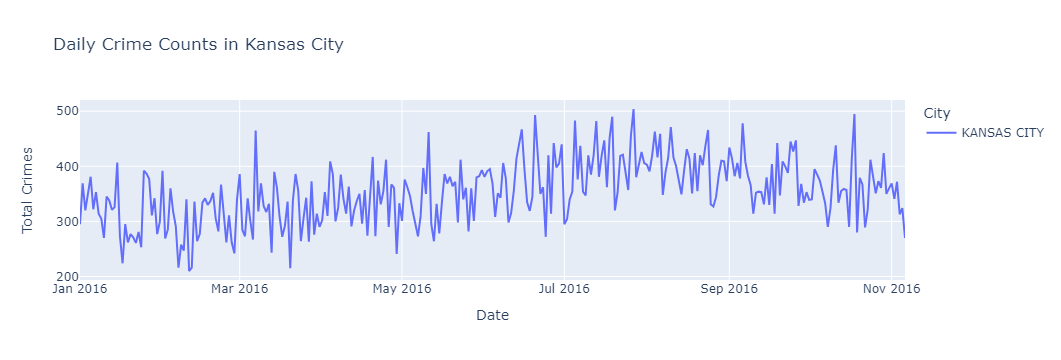

In [43]:
# Lấy dataframe có City là Kansas City
kansas_city_df = data[data['City'] == 'KANSAS CITY']

# Nhóm dữ liệu theo ngày và thành phố, sau đó tính tổng số vụ phạm tội hàng ngày
daily_crime_counts = kansas_city_df.groupby(['Reported_Date', 'City']).size().reset_index(name='Total_Crimes')

# Vẽ biểu đồ với Plotly
fig = px.line(daily_crime_counts, x='Reported_Date', y='Total_Crimes', color='City', 
              title='Daily Crime Counts in Kansas City',
              labels={'Total_Crimes':'Total Crimes', 'Reported_Date':'Date'})

# Hiển thị biểu đồ
fig.show()

- Xu hướng tổng quát:
    + Biểu đồ cho thấy số lượng vụ phạm tội dao động khá mạnh mỗi ngày trong suốt năm 2016.
    + Không có xu hướng tăng hay giảm rõ ràng về số lượng tội phạm qua các tháng.

- Dao động hàng ngày:
    + Số vụ phạm tội có sự biến động khá lớn mỗi ngày, với một số ngày có số lượng vụ phạm tội rất cao (lên đến khoảng 500 vụ), trong khi một số ngày khác lại có số lượng vụ phạm tội thấp hơn nhiều (khoảng 200 vụ).
    + Điều này cho thấy tính biến động cao trong số lượng tội phạm hàng ngày tại Kansas City.
    
- Các đỉnh cao và thấp:
    + Có một số đỉnh cao (peaks) nổi bật, chẳng hạn vào khoảng tháng 3, tháng 6, và tháng 9, cho thấy những ngày có số lượng vụ phạm tội đặc biệt cao.
    + Ngược lại, cũng có những giai đoạn số lượng tội phạm giảm đáng kể, chẳng hạn vào cuối tháng 2, đầu tháng 4, và cuối tháng 12.
    
- Biến động theo mùa:
    + Mặc dù có nhiều biến động hàng ngày, biểu đồ không cho thấy rõ ràng một mô hình theo mùa nhất định. Cả mùa xuân, mùa hè, mùa thu, và mùa đông đều có các đỉnh cao và thấp khác nhau.


#### Top 9 thành phố còn lại

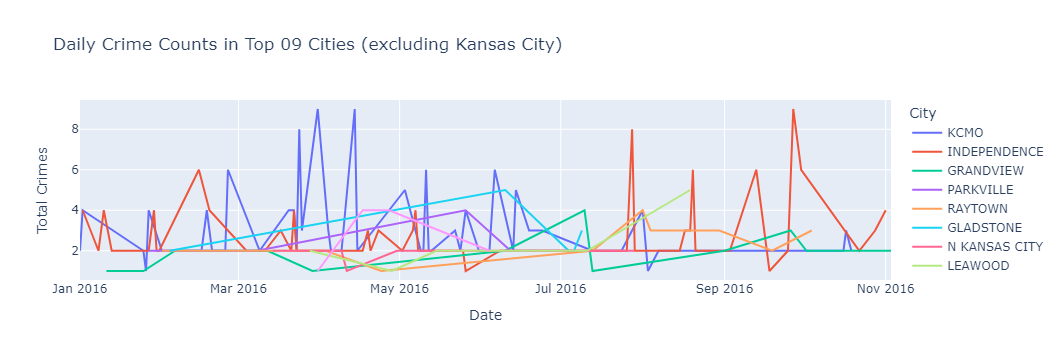

In [47]:
# Loại bỏ Kansas City khỏi danh sách
city_crime_counts = city_crime_counts[city_crime_counts.index != 'KANSAS CITY']

# Lọc dữ liệu 
top_09_cities_df = data[data['City'].isin(city_crime_counts.index)]

# Nhóm dữ liệu theo ngày và thành phố, sau đó tính tổng số vụ phạm tội hàng ngày
daily_crime_counts = top_09_cities_df.groupby(['Reported_Date', 'City']).size().reset_index(name='Total_Crimes')

# Vẽ biểu đồ với Plotly
fig = px.line(daily_crime_counts, x='Reported_Date', y='Total_Crimes', color='City', 
              title='Daily Crime Counts in Top 09 Cities (excluding Kansas City)',
              labels={'Total_Crimes':'Total Crimes', 'Reported_Date':'Date'})

# Hiển thị biểu đồ
fig.show()

- Sự khác biệt giữa các thành phố:
    + KCMO (Kansas City, Missouri): Có sự biến động lớn trong số lượng vụ phạm tội, với một số ngày lên đến 9 vụ. Điều này cho thấy KCMO có số lượng vụ phạm tội nhiều và biến động hơn so với các thành phố khác.
    + INDEPENDENCE: Cũng có nhiều biến động nhưng ở mức độ thấp hơn, với số lượng vụ phạm tội cao nhất khoảng 6 vụ trong một ngày.
    + Các thành phố khác (GRANDVIEW, PARKVILLE, RAYTOWN, GLADSTONE, N KANSAS CITY, LEAWOOD, KEARNEY): Có số lượng vụ phạm tội thấp hơn nhiều so với KCMO và INDEPENDENCE. Hầu hết các ngày đều có số vụ phạm tội dưới 3, và có nhiều ngày không có vụ phạm tội nào.

- Biến động hàng ngày:
    + Mỗi thành phố có biến động về số lượng vụ phạm tội khác nhau. Tuy nhiên, các thành phố như KCMO và INDEPENDENCE cho thấy sự biến động rõ rệt hơn so với các thành phố khác.
    + Số lượng vụ phạm tội tại các thành phố như PARKVILLE, GLADSTONE, và LEAWOOD thường không có sự biến động lớn, chỉ xuất hiện một số đỉnh nhỏ trong suốt năm.
    
- Xu hướng tổng quát:
    + Không có xu hướng tăng hoặc giảm rõ ràng về số lượng vụ phạm tội qua các tháng trong năm 2016.
    + Một số thành phố có sự gia tăng nhẹ vào giữa năm, nhưng không rõ rệt.

- Các đỉnh cao và thấp:
    + Các đỉnh cao về số lượng vụ phạm tội thường xuất hiện không đồng nhất và không tuân theo một mô hình nhất định theo mùa.
    + KCMO có một số đỉnh cao đáng chú ý vào tháng 2, tháng 4, và tháng 9.

- `Kết luận`:
    + KCMO và INDEPENDENCE có số lượng vụ phạm tội cao hơn và biến động mạnh hơn so với các thành phố khác. 
    + Các thành phố như PARKVILLE, GLADSTONE, và LEAWOOD có số lượng vụ phạm tội thấp và ít biến động hơn. 
    + Điều này có thể phản ánh đặc điểm tội phạm riêng biệt của từng khu vực, và cung cấp thông tin hữu ích cho việc phân tích và triển khai các biện pháp phòng chống tội phạm tại các khu vực này.